In [8]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [9]:
Savee = "C:\All_Files\BE Project\Savee\ALL/"
Tess = "C:\All_Files\BE Project\Tess\TESS Toronto emotional speech set data/"
Ravdess = "C:\All_Files\BE Project\Ravdess\RavdessSpeech/"
Hindi="C:\All_Files\BE Project\DataSet\\"
Crema = "C:\All_Files\BE Project\Cremad\AudioWAV/"


In [10]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:\All_Files\BE Project\Tess\TESS Toronto emot...
1,angry,C:\All_Files\BE Project\Tess\TESS Toronto emot...
2,angry,C:\All_Files\BE Project\Tess\TESS Toronto emot...
3,angry,C:\All_Files\BE Project\Tess\TESS Toronto emot...
4,angry,C:\All_Files\BE Project\Tess\TESS Toronto emot...


In [11]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + file)

    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:\All_Files\BE Project\Cremad\AudioWAV/1001_D...
1,disgust,C:\All_Files\BE Project\Cremad\AudioWAV/1001_D...
2,fear,C:\All_Files\BE Project\Cremad\AudioWAV/1001_D...
3,happy,C:\All_Files\BE Project\Cremad\AudioWAV/1001_D...
4,neutral,C:\All_Files\BE Project\Cremad\AudioWAV/1001_D...


In [12]:
hindi_directory_list=os.listdir(Hindi)

file_emotion = []
file_path = []
for file in hindi_directory_list:
    part = file.split('_')
    file_emotion.append(part[0])
    file_path.append(Hindi + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Hindi_df = pd.concat([emotion_df, path_df], axis=1)

Hindi_df.head()

,Emotions,Path
0,angry,C:\All_Files\BE Project\DataSet\angry_10_1.wav
1,angry,C:\All_Files\BE Project\DataSet\angry_10_10.wav
2,angry,C:\All_Files\BE Project\DataSet\angry_10_11.wav
3,angry,C:\All_Files\BE Project\DataSet\angry_10_12.wav
4,angry,C:\All_Files\BE Project\DataSet\angry_10_13.wav


In [13]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,C:\All_Files\BE Project\Savee\ALL/DC_a01.wav
1,angry,C:\All_Files\BE Project\Savee\ALL/DC_a02.wav
2,angry,C:\All_Files\BE Project\Savee\ALL/DC_a03.wav
3,angry,C:\All_Files\BE Project\Savee\ALL/DC_a04.wav
4,angry,C:\All_Files\BE Project\Savee\ALL/DC_a05.wav


In [14]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\All_Files\BE Project\Ravdess\RavdessSpeech/...
1,neutral,C:\All_Files\BE Project\Ravdess\RavdessSpeech/...
2,neutral,C:\All_Files\BE Project\Ravdess\RavdessSpeech/...
3,neutral,C:\All_Files\BE Project\Ravdess\RavdessSpeech/...
4,calm,C:\All_Files\BE Project\Ravdess\RavdessSpeech/...


In [15]:
#Combining all 4 ddatasets and forming their datapaths in csv file
data_path = pd.concat([Savee_df,Ravdess_df,Tess_df,Crema_df,Hindi_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,C:\All_Files\BE Project\Savee\ALL/DC_a01.wav
1,angry,C:\All_Files\BE Project\Savee\ALL/DC_a02.wav
2,angry,C:\All_Files\BE Project\Savee\ALL/DC_a03.wav
3,angry,C:\All_Files\BE Project\Savee\ALL/DC_a04.wav
4,angry,C:\All_Files\BE Project\Savee\ALL/DC_a05.wav


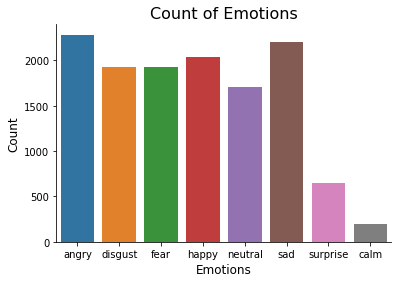

In [16]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [17]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [18]:
'''def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data'''

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [19]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    '''# data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically'''
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [20]:
data_path['Path'][:1]

0    C:\All_Files\BE Project\Savee\ALL/DC_a01.wav
Name: Path, dtype: object

In [21]:
#feature = get_features(str(data_path['Path'][:1]))

In [22]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:#multiple features per audio
        X.append(ele)Ṭ
        Y.append(emotion)

In [23]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('cnntrialmlpfeatures.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.038891,0.470030,0.577977,0.554338,0.482513,0.459260,0.483099,0.504528,0.459470,0.537165,...,0.000008,0.000002,0.000002,0.000002,0.000002,0.000003,0.000004,0.000006,0.000006,angry
1,0.032809,0.358430,0.503856,0.616875,0.561644,0.449105,0.437660,0.474675,0.471159,0.439713,...,0.000014,0.000008,0.000005,0.000005,0.000005,0.000006,0.000008,0.000011,0.000012,angry
2,0.033904,0.657557,0.696857,0.616553,0.544234,0.478499,0.445451,0.418413,0.456779,0.550003,...,0.000054,0.000058,0.000068,0.000079,0.000093,0.000126,0.000195,0.000324,0.000382,angry
3,0.039182,0.532378,0.637463,0.690856,0.627018,0.561282,0.473005,0.422298,0.391779,0.452012,...,0.000057,0.000056,0.000064,0.000076,0.000087,0.000117,0.000171,0.000256,0.000272,angry
4,0.034050,0.499476,0.400486,0.444634,0.500044,0.509017,0.532764,0.539512,0.576321,0.527569,...,0.000008,0.000005,0.000004,0.000004,0.000004,0.000005,0.000007,0.000009,0.000011,angry


In [24]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [88]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [89]:
trdata=pd.read_csv('C:\All_Files\BE Project\\trials\cnntrialmlpfeatures.csv')

In [90]:
trdata.shape

(25842, 163)

In [91]:
trdata.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '153', '154', '155', '156', '157', '158', '159', '160', '161',
       'labels'],
      dtype='object', length=163)

In [92]:
X = trdata.drop('labels', axis = 1).values
Y = trdata['labels'].values

In [93]:
X.shape,Y.shape

((25842, 162), (25842,))

In [94]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [95]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19381, 162), (19381, 8), (6461, 162), (6461, 8))

In [96]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19381, 162), (19381, 8), (6461, 162), (6461, 8))

In [97]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19381, 162, 1), (19381, 8), (6461, 162, 1), (6461, 8))

In [98]:
feature_vector_length=x_train.shape[1]
input_shape=(feature_vector_length,)
num_classes=8

In [99]:
model=Sequential()
model.add(Dense(350,input_shape=input_shape,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trialmod=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_test,y_test), verbose=2)

Epoch 1/50
606/606 - 3s - loss: 1.3471 - accuracy: 0.4785 - val_loss: 1.1584 - val_accuracy: 0.5448 - 3s/epoch - 4ms/step
Epoch 2/50
606/606 - 1s - loss: 1.1116 - accuracy: 0.5643 - val_loss: 1.1152 - val_accuracy: 0.5680 - 1s/epoch - 2ms/step
Epoch 3/50
606/606 - 1s - loss: 1.0400 - accuracy: 0.5918 - val_loss: 1.0806 - val_accuracy: 0.5790 - 1s/epoch - 2ms/step
Epoch 4/50
606/606 - 1s - loss: 0.9921 - accuracy: 0.6105 - val_loss: 1.0711 - val_accuracy: 0.5906 - 1s/epoch - 2ms/step
Epoch 5/50
606/606 - 1s - loss: 0.9422 - accuracy: 0.6328 - val_loss: 1.0537 - val_accuracy: 0.5936 - 1s/epoch - 2ms/step
Epoch 6/50
606/606 - 1s - loss: 0.9064 - accuracy: 0.6433 - val_loss: 1.0471 - val_accuracy: 0.6004 - 1s/epoch - 2ms/step
Epoch 7/50
606/606 - 1s - loss: 0.8795 - accuracy: 0.6553 - val_loss: 1.0917 - val_accuracy: 0.5922 - 1s/epoch - 2ms/step
Epoch 8/50
606/606 - 1s - loss: 0.8365 - accuracy: 0.6758 - val_loss: 1.0830 - val_accuracy: 0.6081 - 1s/epoch - 2ms/step
Epoch 9/50
606/606 - 1s 

202/202 [==============================] - 0s 1ms/step - loss: 1.9951 - accuracy: 0.6324
Accuracy of our model on test data :  63.240987062454224 %


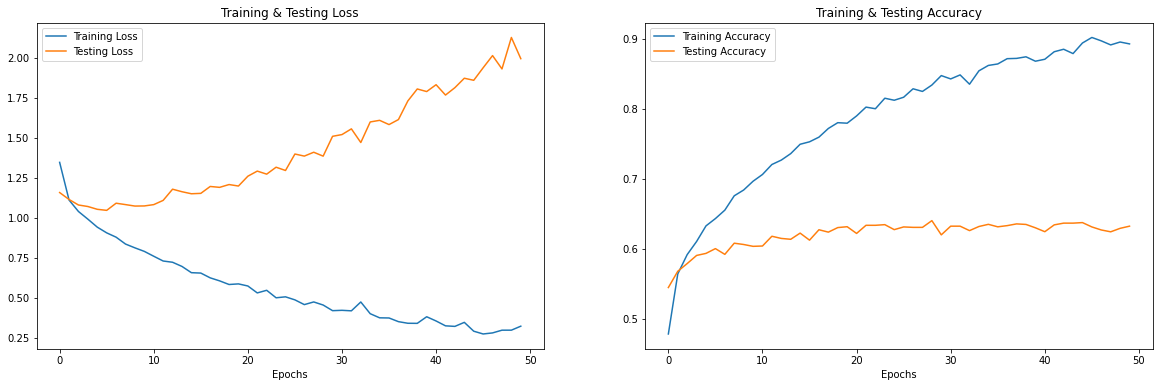

In [100]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = trialmod.history['accuracy']
train_loss = trialmod.history['loss']
test_acc = trialmod.history['val_accuracy']
test_loss = trialmod.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [101]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [102]:
model.save("modelmlpbycnntrial.h5")

In [103]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,sad,sad
1,angry,angry
2,neutral,disgust
3,disgust,disgust
4,fear,neutral
5,happy,happy
6,angry,angry
7,angry,angry
8,fear,neutral
9,fear,fear


In [104]:

x_train.shape, x_test.shape, y_train.shape,y_test.shape
#test_results = model.evaluate(x_test, y_test, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

((19381, 162, 1), (6461, 162, 1), (19381, 8), (6461, 1))

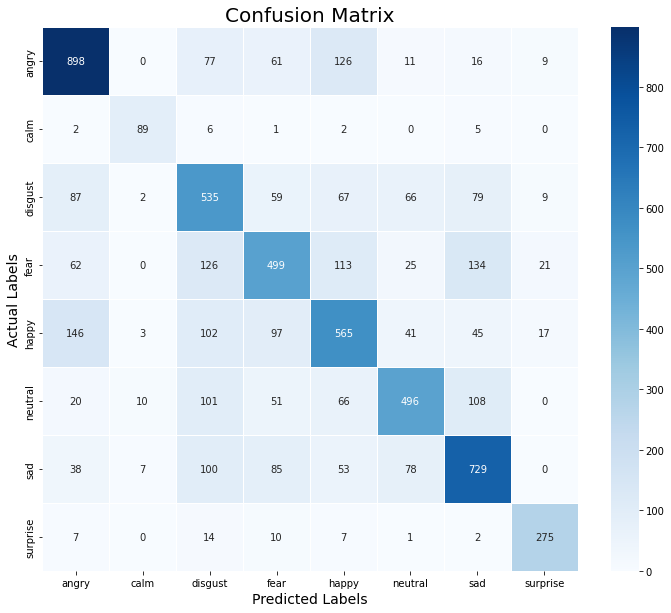

In [105]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [106]:
print(classification_report(y_test, y_pred))
print("           Accuracy with MLP(Keras):{:.2f}".format(test_acc[len(test_acc)-1]*100))
print("Accuracy obtained with all 4 English Datasets:\nRAVDESS,TESS,SAVEE,CREMA-D")

              precision    recall  f1-score   support

       angry       0.71      0.75      0.73      1198
        calm       0.80      0.85      0.82       105
     disgust       0.50      0.59      0.54       904
        fear       0.58      0.51      0.54       980
       happy       0.57      0.56      0.56      1016
     neutral       0.69      0.58      0.63       852
         sad       0.65      0.67      0.66      1090
    surprise       0.83      0.87      0.85       316

    accuracy                           0.63      6461
   macro avg       0.67      0.67      0.67      6461
weighted avg       0.63      0.63      0.63      6461

           Accuracy with CNN:63.24
Accuracy obtained with all 4 English Datasets:
RAVDESS,TESS,SAVEE,CREMA-D
